In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\f

In [2]:
# 시각화 함수
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")
    
def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min()  # 최소값을 0으로 만들어 패딩이 하얗게 보이도록 합니다.
    w,h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad, (h+pad)*n_cols+pad))
    for y in range(n_rows):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(x*(w+pad)+pad):(x*(w+pad)+pad+w)] = images[y*n_cols+x]
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.axis("off")

In [3]:
# 3D 데이터셋 만들기
np.random.seed(42)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m,3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])

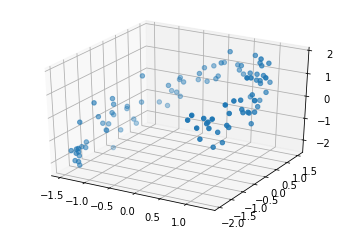

In [4]:
# 원본 데이터(X_train) 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2])

In [5]:
## layer parameters
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs # 오토인코더: input,output 크기가 같다.

## autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=None)
outputs = tf.layers.dense(hidden, n_outputs)


## train parameters
learning_rate = 0.01
n_epochs = 1000
pca = hidden

## loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs-X)) # MSE

## optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        _, _loss = sess.run([train_op, reconstruction_loss], feed_dict={X: X_train})
        print(f'loss: {_loss:.5f}')
    pca_val = sess.run(pca, feed_dict={X: X_train})
    res = sess.run(outputs, feed_dict={X: X_train})

W0825 22:44:04.359945  5304 deprecation.py:323] From <ipython-input-5-af679c9e82e8>:8: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0825 22:44:04.361937  5304 deprecation.py:506] From C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


loss: 2.07660
loss: 2.00208
loss: 1.93201
loss: 1.86582
loss: 1.80359
loss: 1.74474
loss: 1.68899
loss: 1.63626
loss: 1.58644
loss: 1.53933
loss: 1.49478
loss: 1.45266
loss: 1.41289
loss: 1.37537
loss: 1.33996
loss: 1.30655
loss: 1.27505
loss: 1.24538
loss: 1.21746
loss: 1.19120
loss: 1.16651
loss: 1.14330
loss: 1.12150
loss: 1.10104
loss: 1.08184
loss: 1.06383
loss: 1.04693
loss: 1.03107
loss: 1.01620
loss: 1.00224
loss: 0.98913
loss: 0.97682
loss: 0.96523
loss: 0.95431
loss: 0.94402
loss: 0.93429
loss: 0.92508
loss: 0.91633
loss: 0.90800
loss: 0.90005
loss: 0.89244
loss: 0.88512
loss: 0.87806
loss: 0.87123
loss: 0.86457
loss: 0.85808
loss: 0.85170
loss: 0.84542
loss: 0.83920
loss: 0.83302
loss: 0.82684
loss: 0.82065
loss: 0.81441
loss: 0.80810
loss: 0.80169
loss: 0.79515
loss: 0.78846
loss: 0.78158
loss: 0.77449
loss: 0.76716
loss: 0.75956
loss: 0.75165
loss: 0.74341
loss: 0.73479
loss: 0.72578
loss: 0.71634
loss: 0.70644
loss: 0.69607
loss: 0.68518
loss: 0.67378
loss: 0.66185
loss: 

loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 

pca_val.shape : (100, 2)


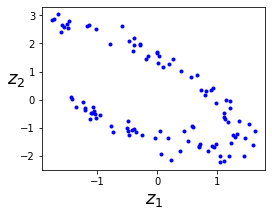

In [6]:
fig = plt.figure(figsize=(4,3))
plt.plot(pca_val[:,0], pca_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
print('pca_val.shape :', pca_val.shape) # 차원 축소 된것 확인.
plt.show()

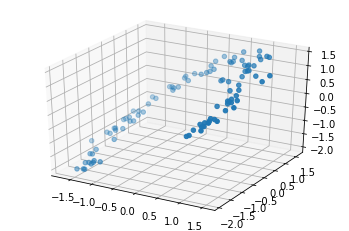

In [7]:
# 오토인코더로 디코딩된 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(res[:,0], res[:,1], res[:,2])